In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,  OrdinalEncoder #type: ignore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\dt1516\Copper_Set.xlsx")
df.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,08F8F1D6-0DAC-42B5-BA8A-B6C99EF1700B,A33557CD-93EF-4828-8235-E0A576C1A925,F9B79E56-2EBF-417B-9802-7F575D1079F7,C01DE4E8-BC5F-42AD-B35F-8FCBEE34C6ED,0B812591-B501-4F34-859A-B06381FAEB44,DE633116-D1DF-4846-982E-55EFC3658A76,A48374B1-E6DB-45F2-889A-1F9C27C099EB,91643238-5C7B-4237-9A5F-63AE3D35F320,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,...,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
#changing the data types
df["quantity tons"]=pd.to_numeric(df["quantity tons"], errors="coerce")
df["item_date_1"]=pd.to_datetime(df["item_date"], format="%Y%m%d", errors="coerce").dt.date
df["deli_date_1"]=pd.to_datetime(df["delivery date"], format="%Y%m%d", errors="coerce").dt.date

In [5]:
df.tail(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,deli_date_1
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0,2020-07-02,2020-07-01
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0,2020-07-02,2020-07-01


In [6]:
# ID column is representation of each individual it has more unique values.
# Material reference column has more null values 
# so i drop those two columns
df.drop(columns=["id", "material_ref"], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,deli_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [8]:
# Quality tons and selling price have negative values, have to correct to get good accuracy score
df["quantity tons"]=df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]=df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181668.0,5.875066e+03,2.349107e+06,1.000000e-05,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181665.0,1.918124e+03,3.318020e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [10]:
df.isnull().sum()

item_date         1
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     8
item_date_1       3
deli_date_1       3
dtype: int64

In [11]:
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["deli_date_1"].fillna(df["deli_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)

In [12]:
# for numerical column use median
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [13]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
item_date_1      0
deli_date_1      0
dtype: int64

In [14]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,deli_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [15]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [16]:
# Encoding
df["status"]= LabelEncoder().fit_transform(df["status"])
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

### Exploitary data analysis

In [17]:
def plot(df,column):
  #violinplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.violinplot(df, x=column)
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [18]:
columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

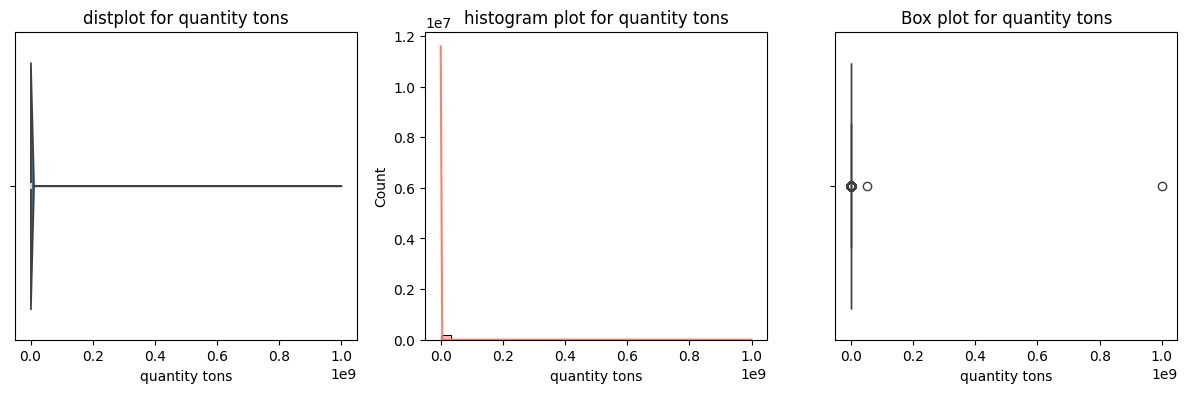

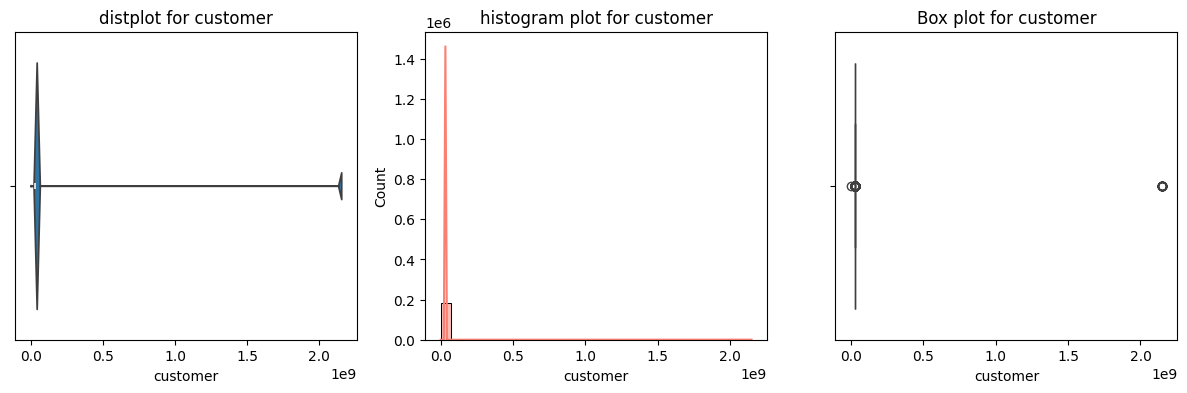

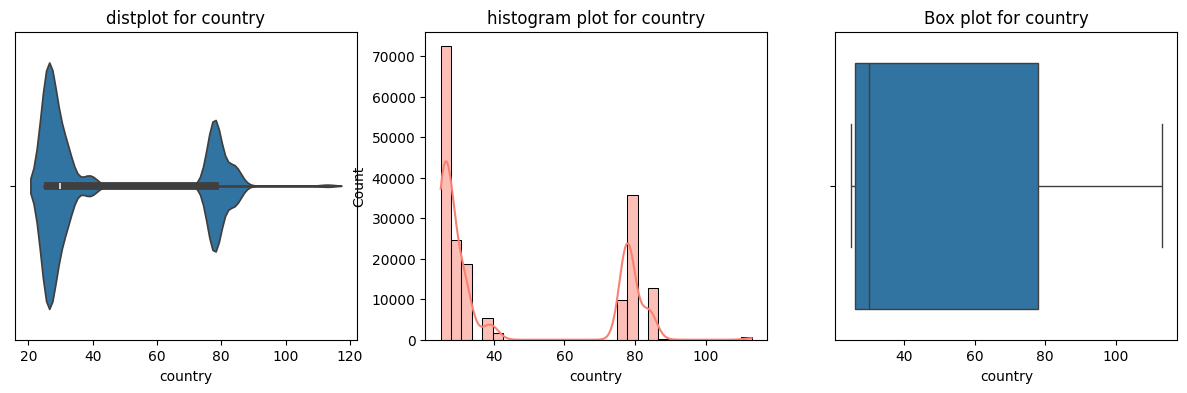

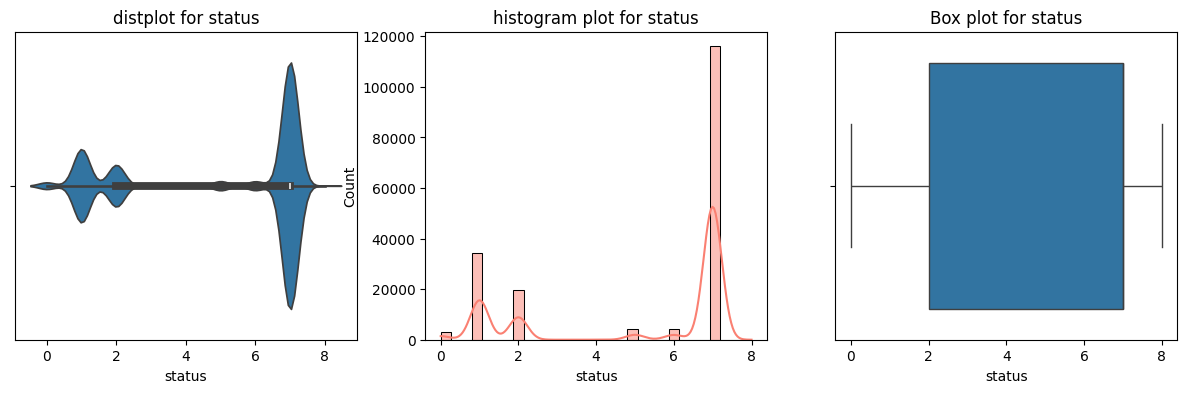

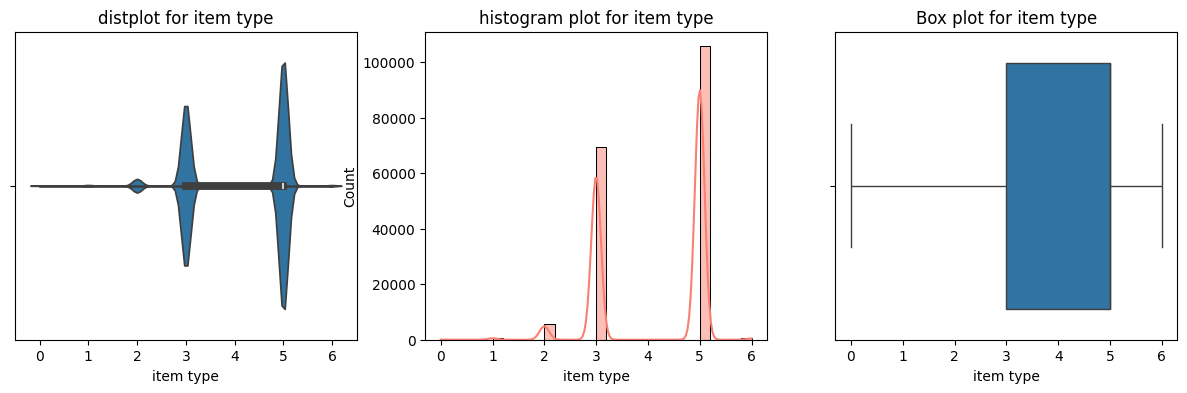

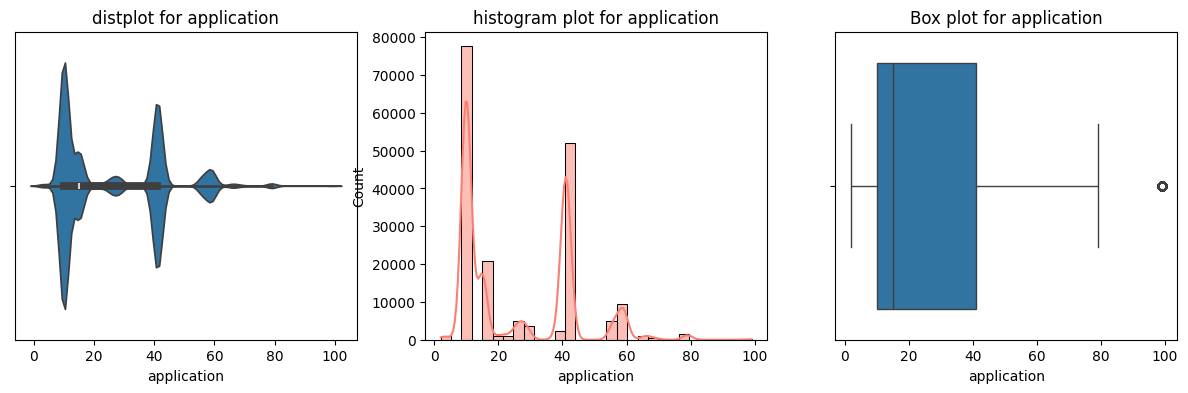

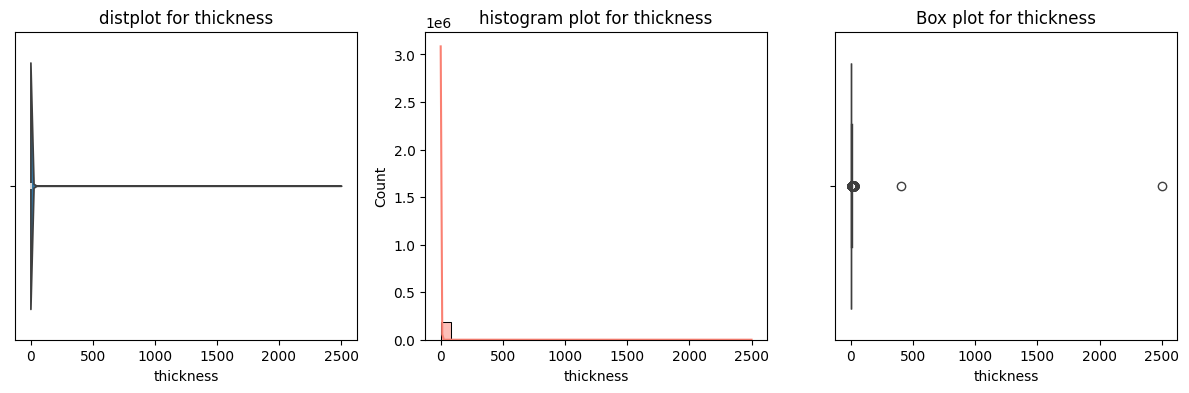

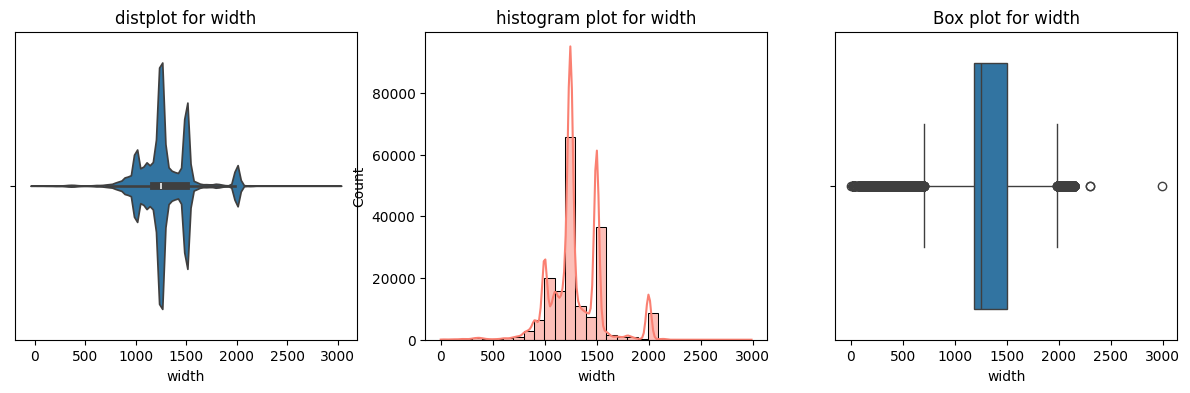

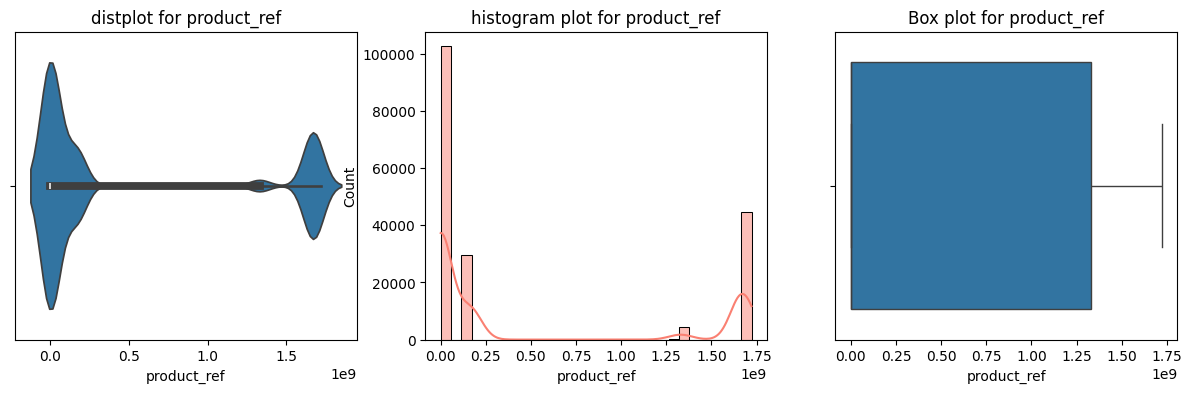

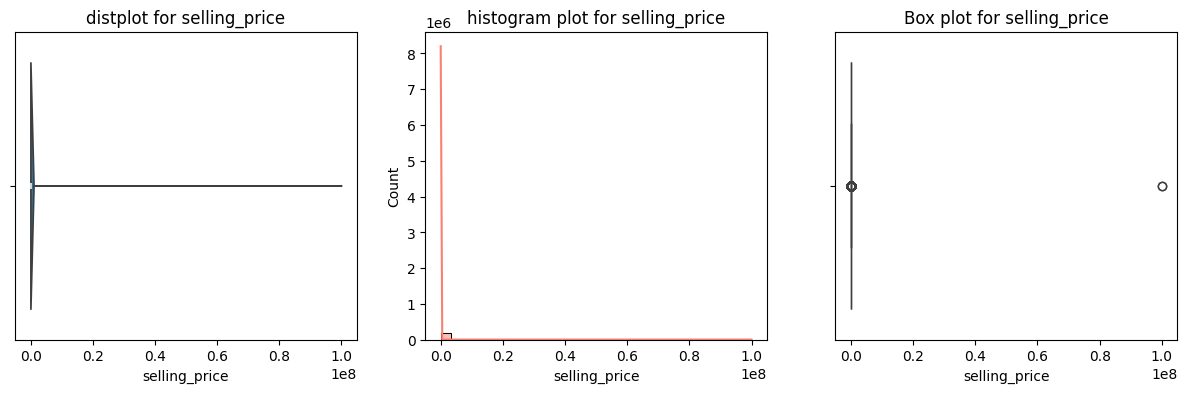

In [19]:
for i in columns:
    plot(df, i)

In [20]:
df1=df.copy()

In [21]:
# Applying log transform to skewed columns(which has tail)

df1["quantity tons"]=np.log(df1["quantity tons"])
df1["customer"]=np.log(df1["customer"])
df1["thickness"]=np.log(df1["thickness"])
df1["selling_price"]=np.log(df1["selling_price"])

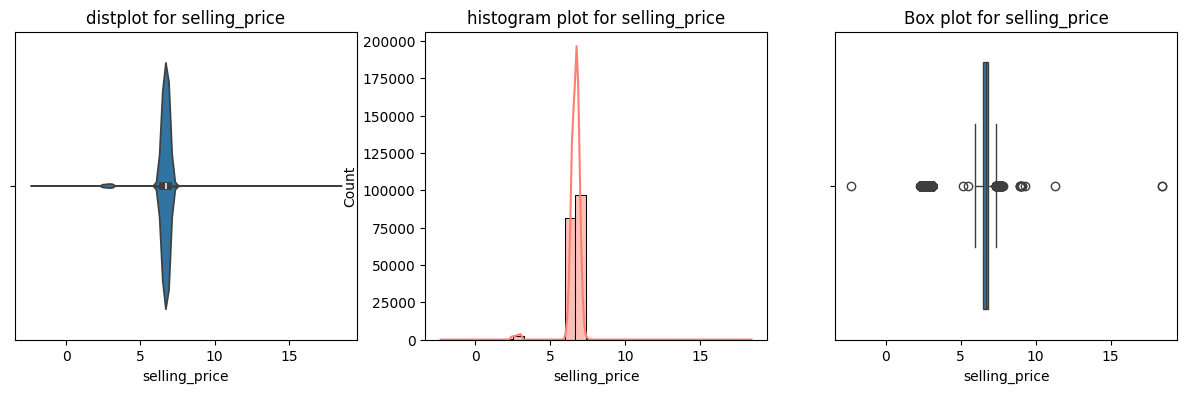

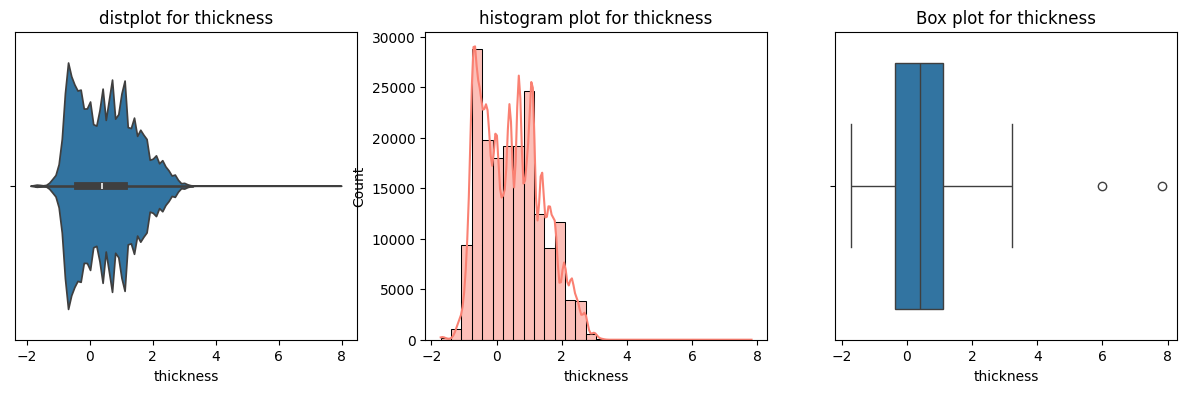

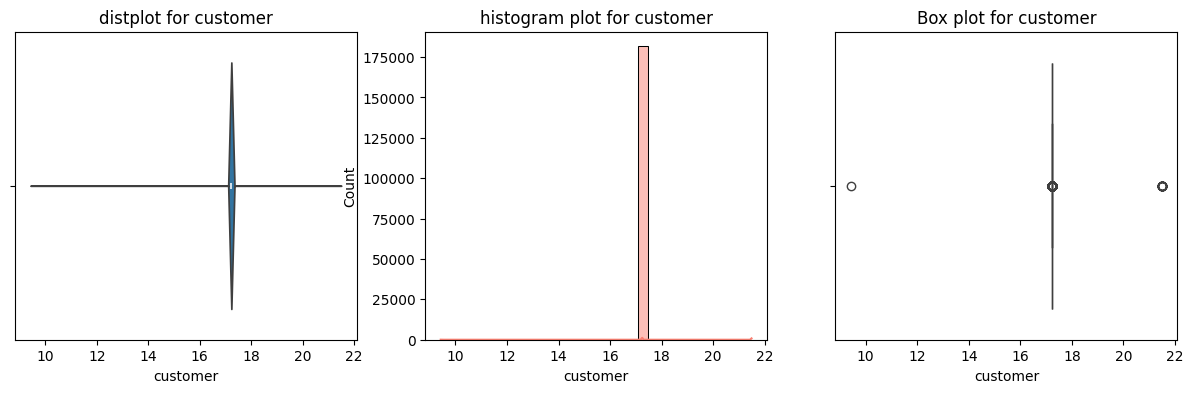

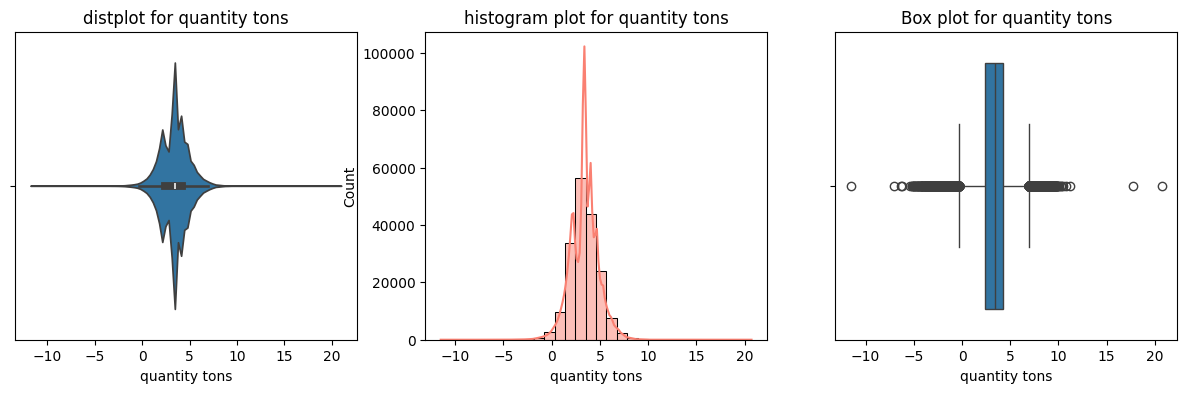

In [22]:
skewed_columns=["selling_price", "thickness", "customer", "quantity tons"]
for i in skewed_columns:
    plot(df1,i)

In [23]:
# Outlier Treatment
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

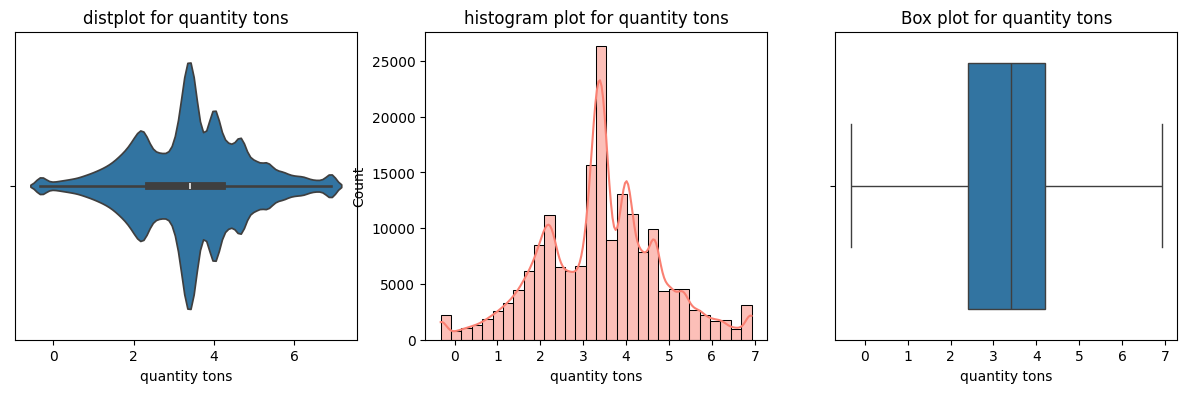

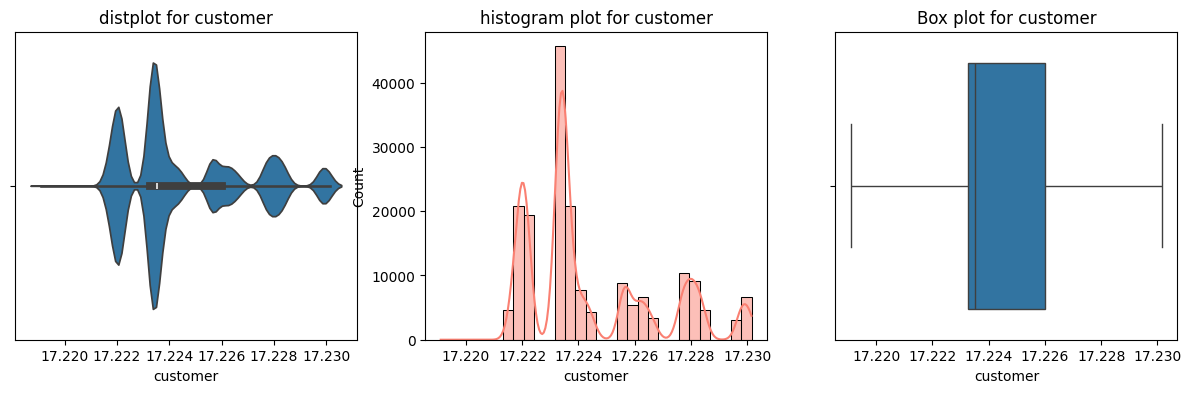

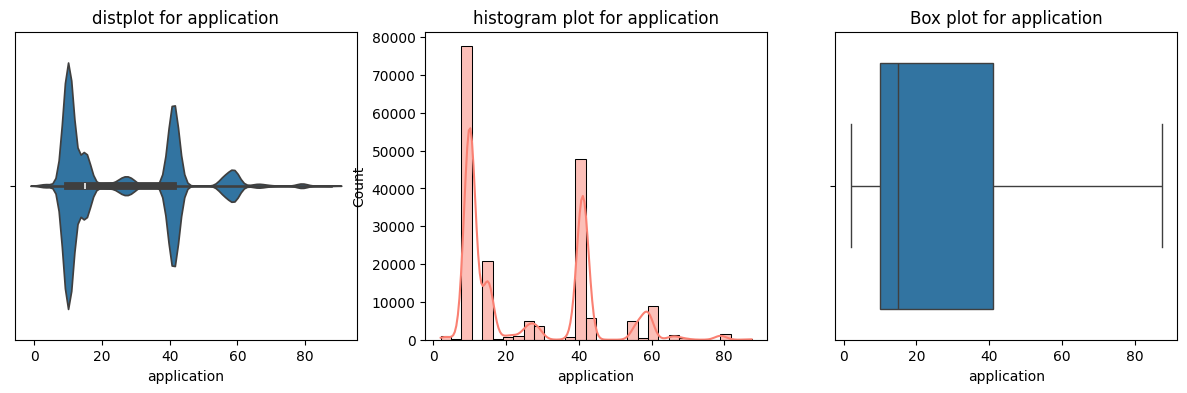

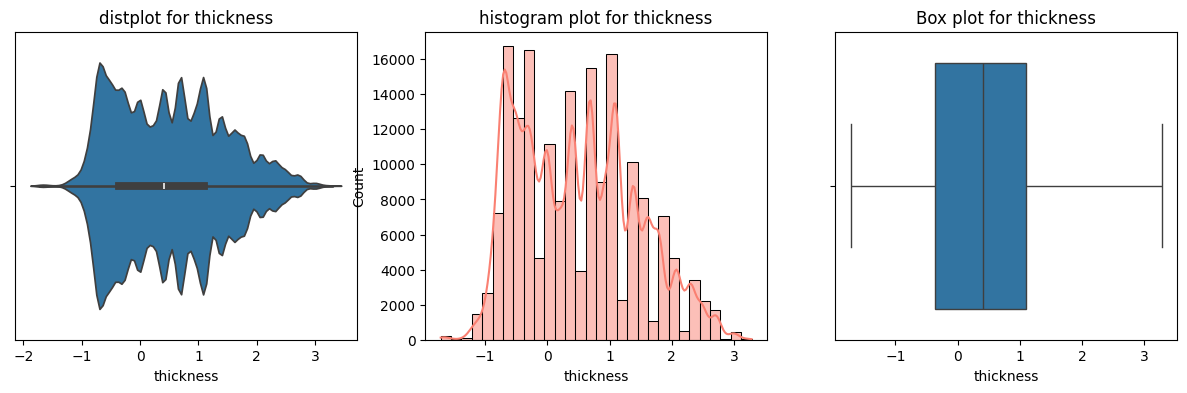

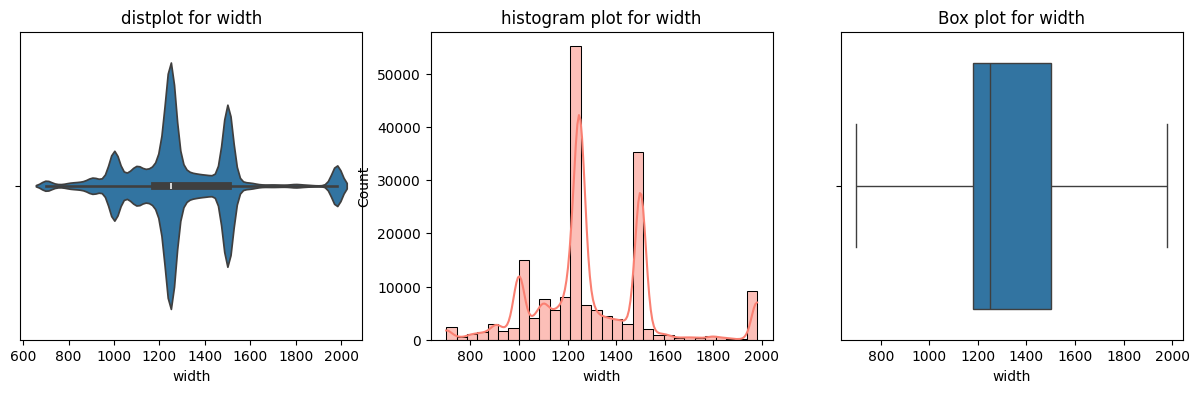

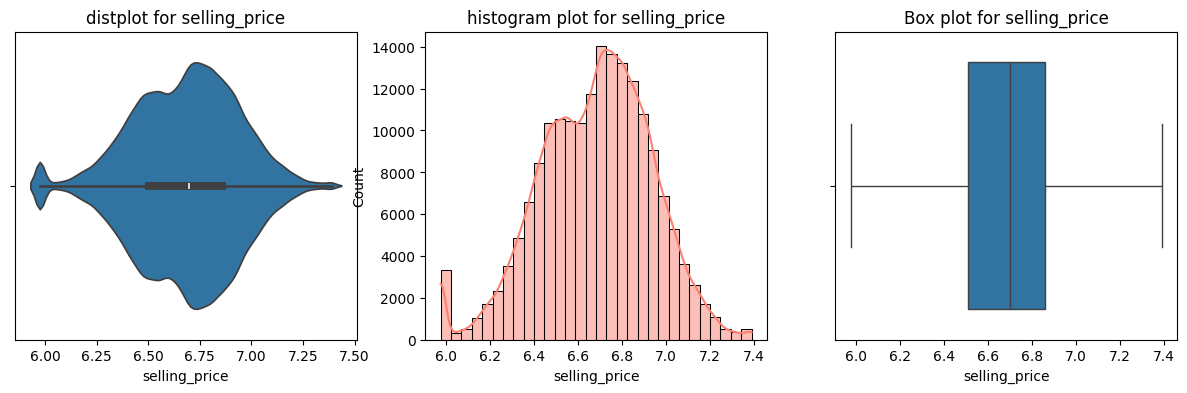

In [24]:
outlier_columns=["quantity tons", "customer", "application", "thickness", "width", "selling_price"]
for i in outlier_columns:
    outlier(df1,i)

for i in outlier_columns:
    plot(df1,i)

In [25]:
df2=df1.drop(columns=["item_date","delivery date","item_date_1","deli_date_1"])

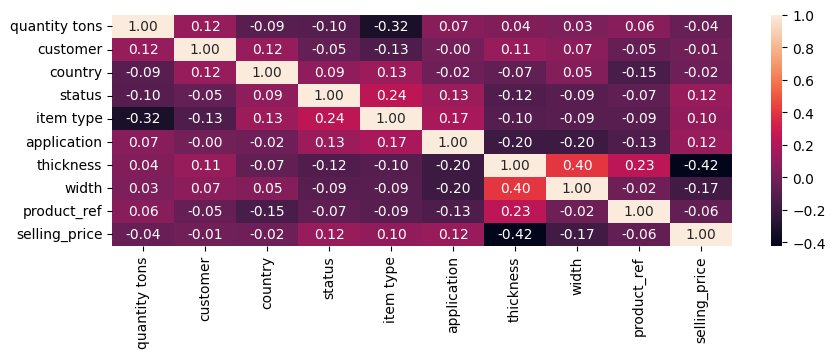

In [26]:
# Correlation checking
corr= df2.corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [27]:
# when compared to item date column, delivery date column has more errors based on date differences
df3=df1.copy()
df3

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,deli_date_1
0,20210401.0,3.991779,17.221905,28.0,7,5.0,10.0,0.693147,1500.0,1670798778,20210701.0,6.749931,2021-04-01,2021-07-01
1,20210401.0,6.643822,17.223450,25.0,7,5.0,41.0,-0.223144,1210.0,1668701718,20210401.0,6.953684,2021-04-01,2021-04-01
2,20210401.0,5.956169,17.221827,30.0,7,6.0,28.0,-0.967584,952.0,628377,20210101.0,6.468211,2021-04-01,2021-01-01
3,20210401.0,5.310301,17.228293,32.0,7,3.0,59.0,0.832909,1317.0,1668701718,20210101.0,6.643790,2021-04-01,2021-01-01
4,20210401.0,6.666354,17.223735,28.0,7,5.0,10.0,1.386294,1980.0,640665,20210301.0,6.357842,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,4.629691,17.223381,25.0,7,5.0,41.0,-0.040822,1220.0,164141591,20200701.0,6.381816,2020-07-02,2020-07-01
181669,20200702.0,5.337954,17.223381,25.0,7,5.0,41.0,-0.051293,1500.0,164141591,20200701.0,6.378426,2020-07-02,2020-07-01
181670,20200702.0,1.443523,17.223381,25.0,7,5.0,41.0,-0.342490,1250.0,164141591,20200701.0,6.428105,2020-07-02,2020-07-01
181671,20200702.0,3.413291,17.223381,25.0,7,5.0,41.0,-0.162519,1250.0,164141591,20200701.0,6.398595,2020-07-02,2020-07-01


In [28]:
# treating dates
df3["item_date_1"]=pd.to_datetime(df3["item_date_1"])
df3["deli_date_1"]=pd.to_datetime(df3["deli_date_1"])

df3["date_differ"]=(df3["item_date_1"]-df3["deli_date_1"]).dt.days


In [29]:
df3["date_differ"]

0        -91
1          0
2         90
3         90
4         31
          ..
181668     1
181669     1
181670     1
181671     1
181672     1
Name: date_differ, Length: 181673, dtype: int64

In [30]:
#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df3["item_date_day"]= df3["item_date_1"].dt.day
df3["item_date_month"]= df3["item_date_1"].dt.month
df3["item_date_year"]= df3["item_date_1"].dt.year

In [31]:
# seperate positive date differences and negative date differences
df3_postive=df3[df3["date_differ"]>=0]
df3_postive.reset_index(drop= True, inplace= True)

In [32]:
df3_postive

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,deli_date_1,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,6.643822,17.223450,25.0,7,5.0,41.0,-0.223144,1210.0,1668701718,20210401.0,6.953684,2021-04-01,2021-04-01,0,1,4,2021
1,20210401.0,5.956169,17.221827,30.0,7,6.0,28.0,-0.967584,952.0,628377,20210101.0,6.468211,2021-04-01,2021-01-01,90,1,4,2021
2,20210401.0,5.310301,17.228293,32.0,7,3.0,59.0,0.832909,1317.0,1668701718,20210101.0,6.643790,2021-04-01,2021-01-01,90,1,4,2021
3,20210401.0,6.666354,17.223735,28.0,7,5.0,10.0,1.386294,1980.0,640665,20210301.0,6.357842,2021-04-01,2021-03-01,31,1,4,2021
4,20210401.0,5.419608,17.223450,25.0,7,5.0,41.0,0.405465,1265.0,1668701718,20210401.0,6.890609,2021-04-01,2021-04-01,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16563,20200702.0,4.629691,17.223381,25.0,7,5.0,41.0,-0.040822,1220.0,164141591,20200701.0,6.381816,2020-07-02,2020-07-01,1,2,7,2020
16564,20200702.0,5.337954,17.223381,25.0,7,5.0,41.0,-0.051293,1500.0,164141591,20200701.0,6.378426,2020-07-02,2020-07-01,1,2,7,2020
16565,20200702.0,1.443523,17.223381,25.0,7,5.0,41.0,-0.342490,1250.0,164141591,20200701.0,6.428105,2020-07-02,2020-07-01,1,2,7,2020
16566,20200702.0,3.413291,17.223381,25.0,7,5.0,41.0,-0.162519,1250.0,164141591,20200701.0,6.398595,2020-07-02,2020-07-01,1,2,7,2020


In [33]:
df3_negative=df3[df3["date_differ"]<0]
df3_negative.reset_index(drop= True, inplace= True)

In [34]:
df3_negative

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,deli_date_1,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,3.991779,17.221905,28.0,7,5.0,10.0,0.693147,1500.0,1670798778,20210701.0,6.749931,2021-04-01,2021-07-01,-91,1,4,2021
1,20210401.0,1.259203,17.223667,30.0,0,5.0,41.0,-0.967584,1125.0,611993,20210701.0,5.975038,2021-04-01,2021-07-01,-91,1,4,2021
2,20210401.0,4.235147,17.228025,38.0,7,3.0,10.0,-0.510826,1275.0,1668701376,20210701.0,7.217443,2021-04-01,2021-07-01,-91,1,4,2021
3,20210401.0,2.216566,17.223667,30.0,0,5.0,41.0,-0.967584,1125.0,611993,20210701.0,5.975038,2021-04-01,2021-07-01,-91,1,4,2021
4,20210401.0,3.314642,17.222210,78.0,7,5.0,10.0,-0.287682,1250.0,164141591,20210701.0,7.001246,2021-04-01,2021-07-01,-91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165100,20200702.0,3.472467,17.224270,25.0,1,3.0,15.0,1.791759,1980.0,640665,20200801.0,6.313548,2020-07-02,2020-08-01,-30,2,7,2020
165101,20200702.0,4.196171,17.222079,30.0,1,3.0,10.0,1.348073,1525.0,640665,20200801.0,6.126869,2020-07-02,2020-08-01,-30,2,7,2020
165102,20200702.0,4.156686,17.222079,30.0,1,3.0,10.0,1.766442,1525.0,640665,20200801.0,6.124683,2020-07-02,2020-08-01,-30,2,7,2020
165103,20200702.0,4.025862,17.222079,30.0,1,3.0,10.0,2.060514,1500.0,640665,20200801.0,6.126869,2020-07-02,2020-08-01,-30,2,7,2020


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "deli_date_1", "date_differ"])
  y= df["date_differ"]

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics


In [37]:
print(accuracy_date_prediction(df3_postive,DecisionTreeRegressor))
print(accuracy_date_prediction(df3_postive,RandomForestRegressor))
print(accuracy_date_prediction(df3_postive,ExtraTreesRegressor))
print(accuracy_date_prediction(df3_postive,GradientBoostingRegressor))
print(accuracy_date_prediction(df3_postive,AdaBoostRegressor))

{'R2_score': 0.9927746863038496, 'Mean_squared_error': np.float64(8.038925769462885), 'Root_mean_squared_error': np.float64(2.835299943473862), 'Mean_absolute_error': np.float64(0.18255884127942065)}
{'R2_score': 0.9936637418033056, 'Mean_squared_error': np.float64(7.0497574834037415), 'Root_mean_squared_error': np.float64(2.655137940560479), 'Mean_absolute_error': np.float64(0.31173506336753165)}
{'R2_score': 0.9866263753287188, 'Mean_squared_error': np.float64(14.879572088111045), 'Root_mean_squared_error': np.float64(3.8574048385036077), 'Mean_absolute_error': np.float64(0.7336964393482197)}
{'R2_score': 0.9880202344375079, 'Mean_squared_error': np.float64(13.328756389324804), 'Root_mean_squared_error': np.float64(3.6508569390383956), 'Mean_absolute_error': np.float64(1.7157580782037147)}
{'R2_score': 0.33938136568136057, 'Mean_squared_error': np.float64(735.0081098957571), 'Root_mean_squared_error': np.float64(27.111032992045086), 'Mean_absolute_error': np.float64(25.29246551715503

In [38]:
# Model for the RandomForest

def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "deli_date_1", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "deli_date_1", "date_differ"])

  y_pred=model.predict(data)
  return y_pred

In [39]:
date_difference=RandomForest(df3_postive, df3_negative)

In [40]:
date_difference

array([ 0.  ,  0.37, 18.85, ...,  1.  ,  1.  ,  1.  ])

In [41]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
  dd= int(round(i,0))
  date_difference_1.append(dd)

In [42]:
df3_negative["date_differ"]= pd.DataFrame(date_difference_1)

In [43]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date

In [44]:
df3_negative["deli_date_1"]= find_delivery_date(df3_negative["item_date_1"],df3_negative["date_differ"])

In [45]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df3_postive,df3_negative],axis=0,ignore_index=True)

In [46]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["deli_date_1"].dt.day
df_final['delivery_date_month']= df_final["deli_date_1"].dt.month
df_final['delivery_date_year']= df_final["deli_date_1"].dt.year

In [47]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","deli_date_1","date_differ"],inplace=True)

In [48]:
df_final.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_date_day', 'item_date_month', 'item_date_year',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [49]:
# Saving the dataframe
df_final.to_csv("Industrial_Copper_Final.csv",index= False)

In [50]:
# Reading the saved "csv" file
df_final= pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\New folder\Industrial_Copper_Final.csv")

## Classification model - TO predict the Status

In [51]:
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle

In [52]:
x= df_final.drop(columns=["status"],axis=1)
y= df_final["status"]

In [53]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [54]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9170496766203385}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9440759598183569}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9449566533645246}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.6566073566445114, 'Accuracy_Test': 0.6528140910967387}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.7456274339814777, 'Accuracy_Test': 0.7421219210127976}


In [55]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [56]:
gridsearch.cv_results_

{'mean_fit_time': array([   9.6318603 ,    9.54041629,    8.87402344,    9.39006028,
           9.57538605,    9.57370448,    9.73577366,    9.22468219,
           9.28586226,   10.29753003,   10.42131104,   12.12621555,
          12.72796278,   12.41647515,   13.51485934,   14.82424026,
          15.20347996,   14.85389013,   48.81051278,   50.22762232,
          55.10696588,   58.57207074,   58.55207934,   53.99366984,
          56.84889688,   63.9976295 ,   63.64541278,   35.95646825,
          32.87902474,   31.30019798,   33.48065543,   34.89401994,
          31.44866629,   28.7084774 ,   29.13925056,   31.48072982,
          30.25162725,   31.22033792,   32.15890069,   30.66302962,
          30.49603834,   28.61327777,   30.81516228,   30.58316507,
          29.92401943,   87.92305894,   87.25467987,   85.0269392 ,
          84.73844213,   84.83473525,   87.63224239,   90.40379248,
          90.42170949,   90.92166162,   41.03532681,   41.28641868,
          41.94196477,   40.469

In [57]:
gridsearch.best_score_

np.float64(0.9272179390767942)

In [58]:
gridsearch.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9837826308329549
Accuracy_Test:  0.9322691619650475
  
Confution_matrix for Test
--------------------------
[[  660     0     0     0     0     0     0     0]
 [    0  6274   100     0     0    12     8   570]
 [    0   145  3417     0     0    14     3   392]
 [    0     0     0     1     0     0     0     0]
 [    0     1     0     0     5     0     0     2]
 [    0    97    37     0     0   474     1   241]
 [    0    25    20     0     0     0   697    79]
 [    0   402   230     0     0    60    22 22346]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       0.90      0.90      0.90      6964
           2       0.90      0.86      0.88      3971
           3       1.00      1.00      1.00         1
           4       1.00      0.62      0.77         8
     

In [62]:

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


In [63]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [64]:
with open("Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [65]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


## Regression Method - Predict the Selling Price

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
df_regg= df_final.copy()

In [69]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price"], axis=1)
  y= df["selling_price"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [70]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999249831305841, 'R2_Test': 0.9379057408319975}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.994865125310511, 'R2_Test': 0.9666699831765131}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999249831305841, 'R2_Test': 0.9633194822317152}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6866177204693786, 'R2_Test': 0.6894265919440676}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8885181449572629, 'R2_Test': 0.8910924324218655}


In [71]:
x= df_regg.drop(columns=["selling_price"], axis=1)
y= df_regg["selling_price"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [72]:
gridsearch_r.cv_results_

{'mean_fit_time': array([   5.73976479,    6.19761901,    5.39157352,    5.74431386,
           5.59373527,    5.54687204,    5.84912629,    5.5254221 ,
           5.72356844,    5.58658566,    5.71839275,    5.73687811,
           5.77282276,    5.64624071,    5.49919448,    5.84575114,
           5.6807385 ,    5.39170132,   18.72554173,   19.07787552,
          19.52793007,   19.69837904,   19.49370937,   19.42898254,
          19.34690213,   19.6938231 ,   20.24203   ,   10.21734409,
          10.64681535,   10.73314781,   11.21543007,   11.00642819,
          10.6914978 ,   11.10145998,   11.36238847,   10.93187146,
          11.20738149,   11.24546676,   11.36435671,   11.90546007,
          12.69391036,   12.69721537,   12.78136415,   12.61700926,
          11.90324159,   44.48824062,   45.29004841,   41.73645706,
          39.78454432,   38.93208075,   39.54554939,   39.33201666,
          41.85264478,   43.4004046 ,   25.54214659,   26.59694967,
          27.77755623,   26.708

In [73]:
gridsearch_r.best_score_

np.float64(0.9603286175488874)

In [74]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [75]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price'], axis=1)
y = df_regg['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9878947893725493, 0.9660432113053404)

In [76]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price'], axis=1)
y = df_regg['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9659679822309293,
 'Mean Absolute Error': np.float64(0.030175898848325864),
 'Mean Squared Error': np.float64(0.0022308991561869242),
 'Root Mean Squared Error': np.float64(0.047232395198496174)}

In [77]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.258981836648586
Predicted selling price without Log:  1420.8091846643817


In [78]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)

In [79]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [80]:
df_final.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,6.643822,17.223450,25.0,7,5.0,41.0,-0.223144,1210.0,1668701718,6.953684,1,4,2021,1,4,2021
1,5.956169,17.221827,30.0,7,6.0,28.0,-0.967584,952.0,628377,6.468211,1,4,2021,1,1,2021
2,5.310301,17.228293,32.0,7,3.0,59.0,0.832909,1317.0,1668701718,6.643790,1,4,2021,1,1,2021
3,6.666354,17.223735,28.0,7,5.0,10.0,1.386294,1980.0,640665,6.357842,1,4,2021,1,3,2021
4,5.419608,17.223450,25.0,7,5.0,41.0,0.405465,1265.0,1668701718,6.890609,1,4,2021,1,4,2021


In [81]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.8044725388830924
Predicted selling price without Log:  901.8719420671862
